In [293]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

## 1. Read csv file

In [255]:
dataset = pd.read_csv('dataset/Medical_insurance.csv')
dataset

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[2772 rows x 7 columns]

## 2. Check if there is any missing data

In [256]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 3. Apply one-hot encoding for 'region', 'sex', 'smoker' columns

In [257]:
# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
cols_categorical = ['region', 'sex', 'smoker']
one_hot_encoded_array = encoder.fit_transform(dataset[cols_categorical])
one_hot_df = pd.DataFrame(one_hot_encoded_array, 
                          columns=encoder.get_feature_names_out(cols_categorical))

# Concatenate the one-hot encoded DataFrame with the original dataset
df_sklearn_encoded = pd.concat([dataset.drop(cols_categorical, axis=1), one_hot_df], axis=1)

In [258]:
df_sklearn_encoded

age     bmi  children  ...  sex_male  smoker_no  smoker_yes
0      19  27.900         0  ...       0.0        0.0         1.0
1      18  33.770         1  ...       1.0        1.0         0.0
2      28  33.000         3  ...       1.0        1.0         0.0
3      33  22.705         0  ...       1.0        1.0         0.0
4      32  28.880         0  ...       1.0        1.0         0.0
...   ...     ...       ...  ...       ...        ...         ...
2767   47  45.320         1  ...       0.0        1.0         0.0
2768   21  34.600         0  ...       0.0        1.0         0.0
2769   19  26.030         1  ...       1.0        0.0         1.0
2770   23  18.715         0  ...       1.0        1.0         0.0
2771   54  31.600         0  ...       1.0        1.0         0.0

[2772 rows x 12 columns]

# Feature Normalisation

## 4.Apply MinMaxScaler

In [259]:
# Create a scaler with feature range of [-1, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply to your DataFrame (let's say df)

# Option 2: Apply to specific columns
numeric_cols = ['age', 'bmi', 'charges']  # Adjust to your columns
df_sklearn_encoded[numeric_cols] = scaler.fit_transform(df_sklearn_encoded[numeric_cols])

In [260]:
# Verify the transformation
print(df_sklearn_encoded[numeric_cols].describe())

               age          bmi      charges
count  2772.000000  2772.000000  2772.000000
mean      0.458906     0.396593     0.193771
std       0.306119     0.164903     0.193967
min       0.000000     0.000000     0.000000
25%       0.173913     0.276029     0.056919
50%       0.456522     0.389763     0.131067
75%       0.717391     0.506053     0.246708
max       1.000000     1.000000     1.000000


## 5. Split into training and test sets

In [261]:
X = df_sklearn_encoded.drop('charges', axis=1)  #Input features
y = df_sklearn_encoded['charges']               #Target variable

In [262]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

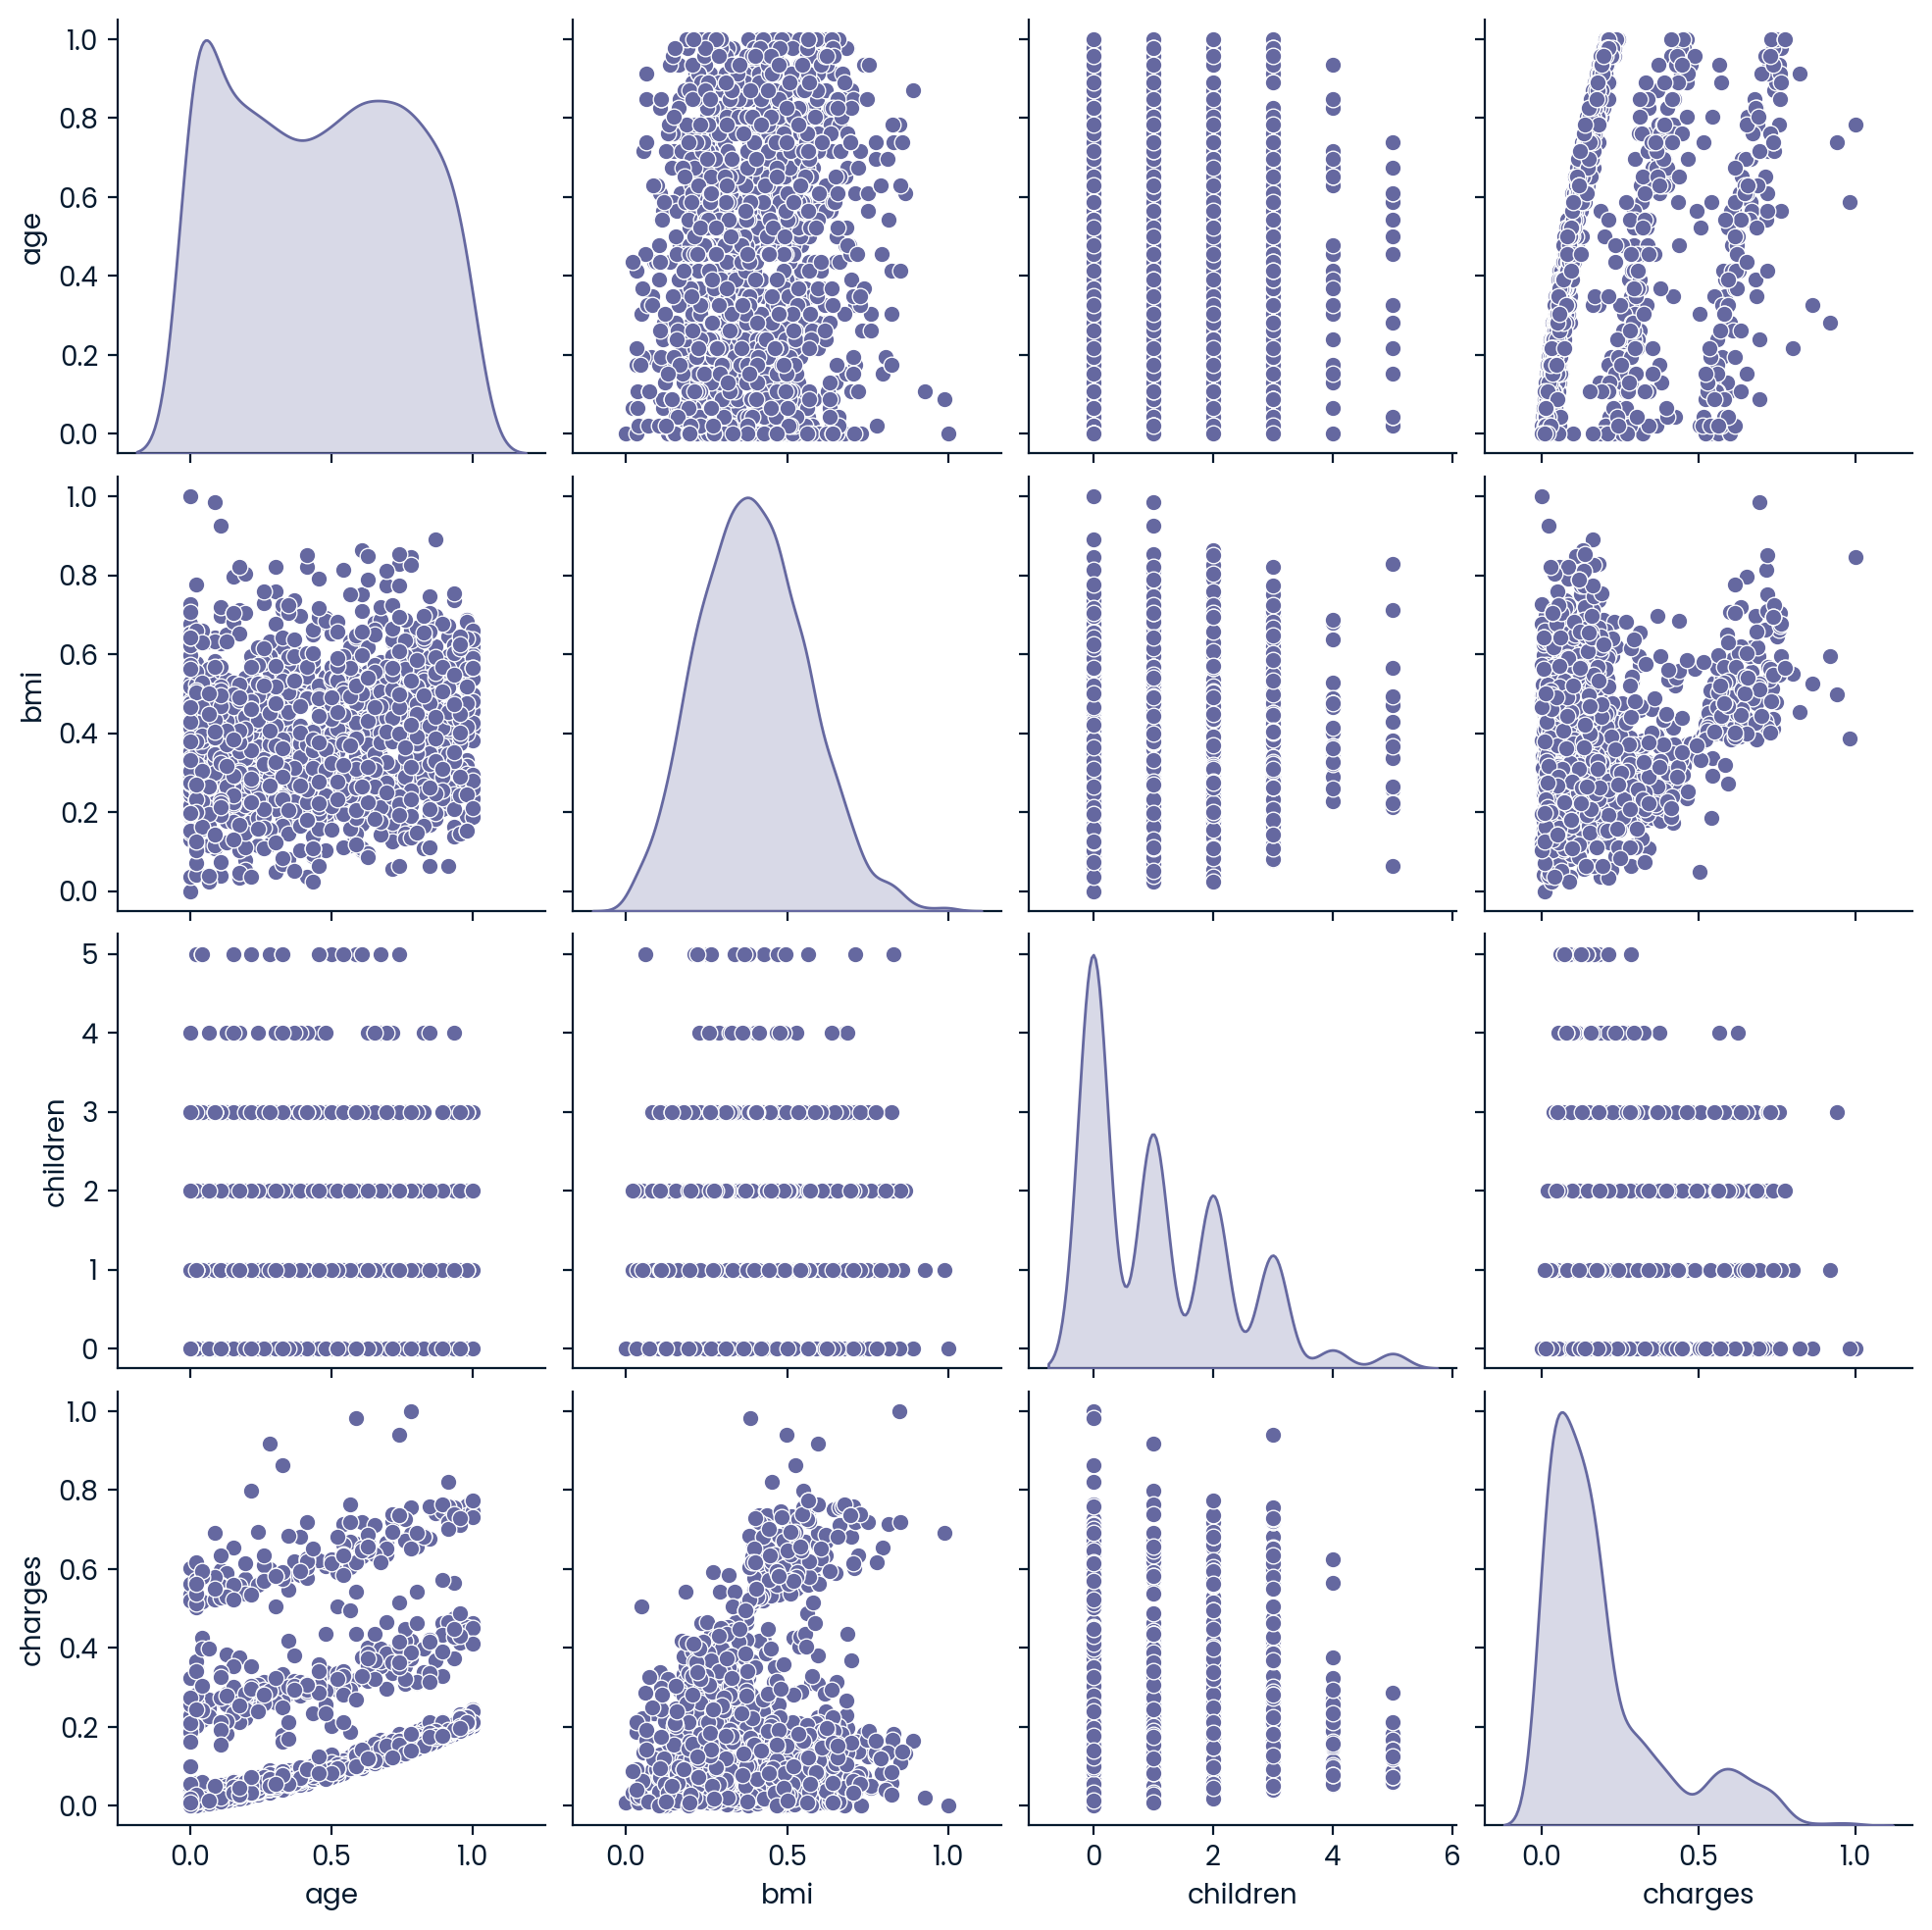

In [263]:
sns.pairplot(df_sklearn_encoded[['age', 'bmi', 'children', 'charges']], diag_kind='kde')

In [264]:
X_train.describe().transpose()

count      mean       std  ...       50%       75%       max
age               2217.0  0.463239  0.302879  ...  0.456522  0.717391  1.000000
bmi               2217.0  0.396972  0.164197  ...  0.391041  0.506053  0.985203
children          2217.0  1.104646  1.211729  ...  1.000000  2.000000  5.000000
region_northeast  2217.0  0.239513  0.426882  ...  0.000000  0.000000  1.000000
region_northwest  2217.0  0.242670  0.428794  ...  0.000000  0.000000  1.000000
region_southeast  2217.0  0.271538  0.444853  ...  0.000000  1.000000  1.000000
region_southwest  2217.0  0.246279  0.430940  ...  0.000000  0.000000  1.000000
sex_female        2217.0  0.489400  0.500000  ...  0.000000  1.000000  1.000000
sex_male          2217.0  0.510600  0.500000  ...  1.000000  1.000000  1.000000
smoker_no         2217.0  0.790708  0.406895  ...  1.000000  1.000000  1.000000
smoker_yes        2217.0  0.209292  0.406895  ...  0.000000  0.000000  1.000000

[11 rows x 8 columns]

# Linear Regression with 1 variable

In [265]:
X_train['bmi']

1864    0.562012
1997    0.506860
1336    0.264730
655     0.251278
261     0.292709
          ...   
1638    0.490987
1095    0.414044
1130    0.212806
1294    0.247915
860     0.851224
Name: bmi, Length: 2217, dtype: float64

In [266]:
# Train the Linear Regression model
model_single = LinearRegression()
history = model_single.fit(X_train[['bmi']], y_train)

In [267]:
X

age       bmi  children  ...  sex_male  smoker_no  smoker_yes
0     0.021739  0.321227         0  ...       0.0        0.0         1.0
1     0.000000  0.479150         1  ...       1.0        1.0         0.0
2     0.217391  0.458434         3  ...       1.0        1.0         0.0
3     0.326087  0.181464         0  ...       1.0        1.0         0.0
4     0.304348  0.347592         0  ...       1.0        1.0         0.0
...        ...       ...       ...  ...       ...        ...         ...
2767  0.630435  0.789884         1  ...       0.0        1.0         0.0
2768  0.065217  0.501480         0  ...       0.0        1.0         0.0
2769  0.021739  0.270917         1  ...       1.0        0.0         1.0
2770  0.108696  0.074119         0  ...       1.0        1.0         0.0
2771  0.782609  0.420769         0  ...       1.0        1.0         0.0

[2772 rows x 11 columns]

In [268]:
X_test

age       bmi  children  ...  sex_male  smoker_no  smoker_yes
1106  0.673913  0.375706         0  ...       0.0        1.0         0.0
1321  0.956522  0.288808         0  ...       1.0        0.0         1.0
2313  0.847826  0.111380         1  ...       0.0        1.0         0.0
2274  0.086957  0.633306         0  ...       1.0        1.0         0.0
1432  0.000000  0.610842         2  ...       0.0        1.0         0.0
...        ...       ...       ...  ...       ...        ...         ...
930   0.173913  0.822437         1  ...       1.0        1.0         0.0
2610  0.500000  0.214689         1  ...       1.0        1.0         0.0
1700  0.195652  0.415389         0  ...       0.0        0.0         1.0
100   0.500000  0.420769         0  ...       0.0        1.0         0.0
315   0.739130  0.465160         0  ...       1.0        1.0         0.0

[555 rows x 11 columns]

In [269]:
# Make predictions for the first 10 rows of the test set
bmi_predictions = model_single.predict(X_test[['bmi']][:10])
bmi_predictions

array([0.19071225, 0.17105641, 0.13092319, 0.24897995, 0.24389864,
       0.15371302, 0.17352099, 0.26297637, 0.22768105, 0.18088433])

In [270]:
X_bmi = X[['bmi']]

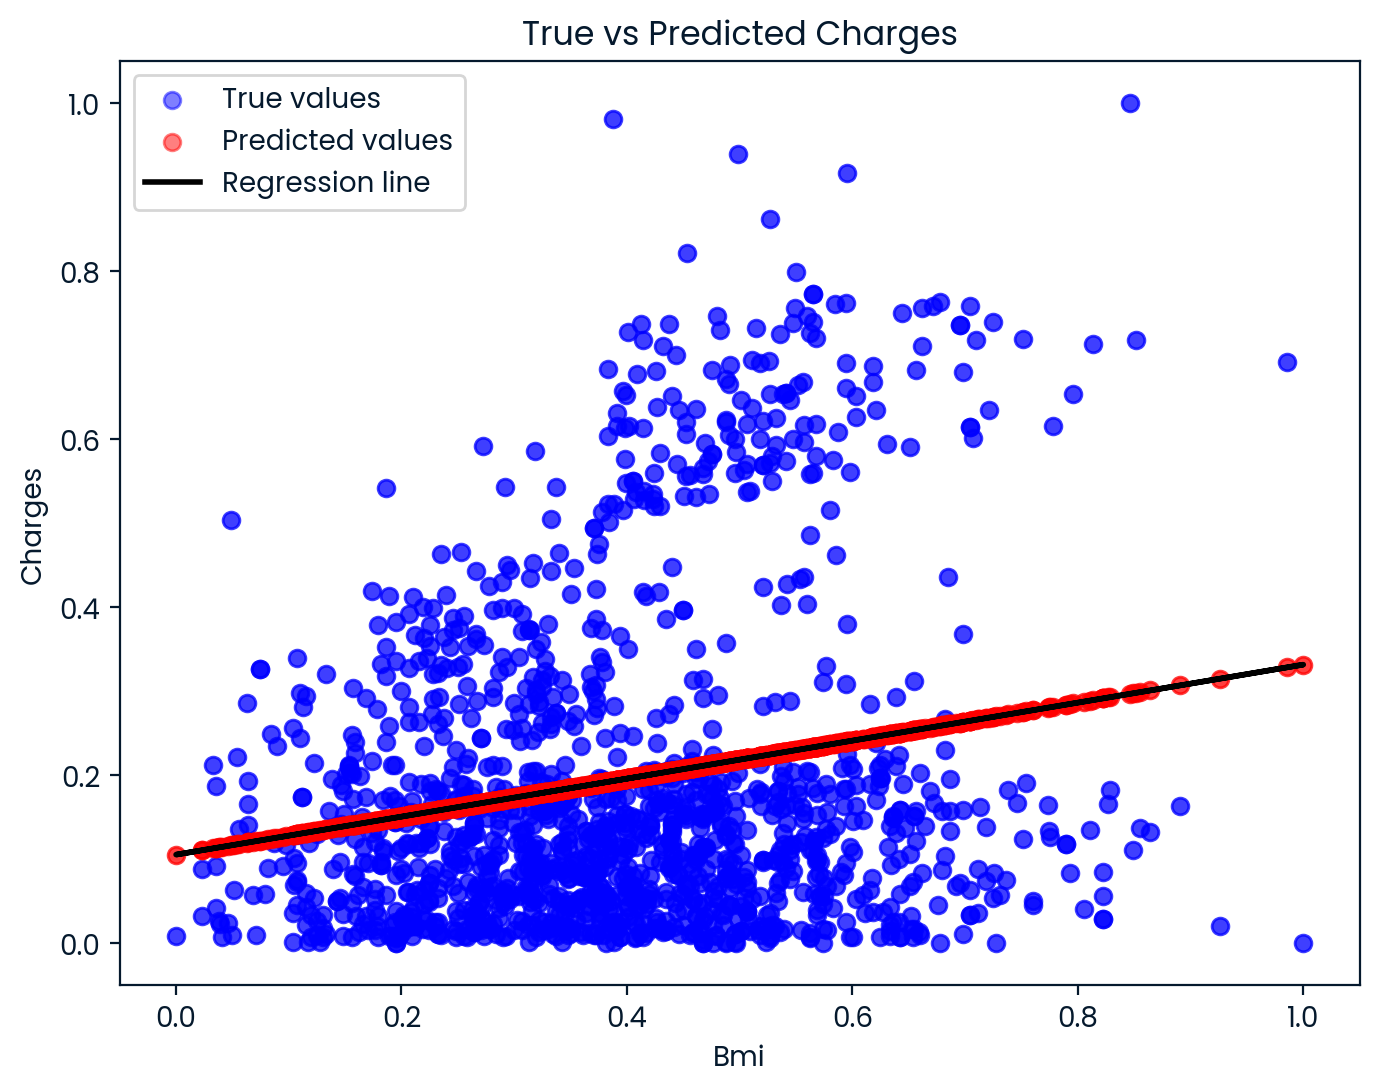

In [271]:
plt.figure(figsize=(8, 6))
plt.scatter(X_bmi, y, color='blue', label='True values', alpha=0.5)
plt.scatter(X_bmi, y_pred_bmi, color='red', label='Predicted values', alpha=0.5)
plt.plot(X_bmi, y_pred_bmi, color='black', linewidth=2, label='Regression line')

# Labels and legend
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.title('True vs Predicted Charges')
plt.legend()
plt.show()

In [272]:
# Make predictions and evaluate the model
y_pred = model_single.predict(X_test[['bmi']])

In [273]:
# Calculate Mean Absolute Error (L1 loss / MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae) 

# Calculate Mean Squared Error (L2 loss / MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse) 

Mean Absolute Error: 0.14704590982677807
Mean Squared Error: 0.037196154894687646


In [274]:
history = model_single.fit(X_train[['age']], y_train)


In [275]:
# Make predictions and evaluate the model
y_pred_age = model_single.predict(X[['age']])
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [276]:
X_age = X[['age']]

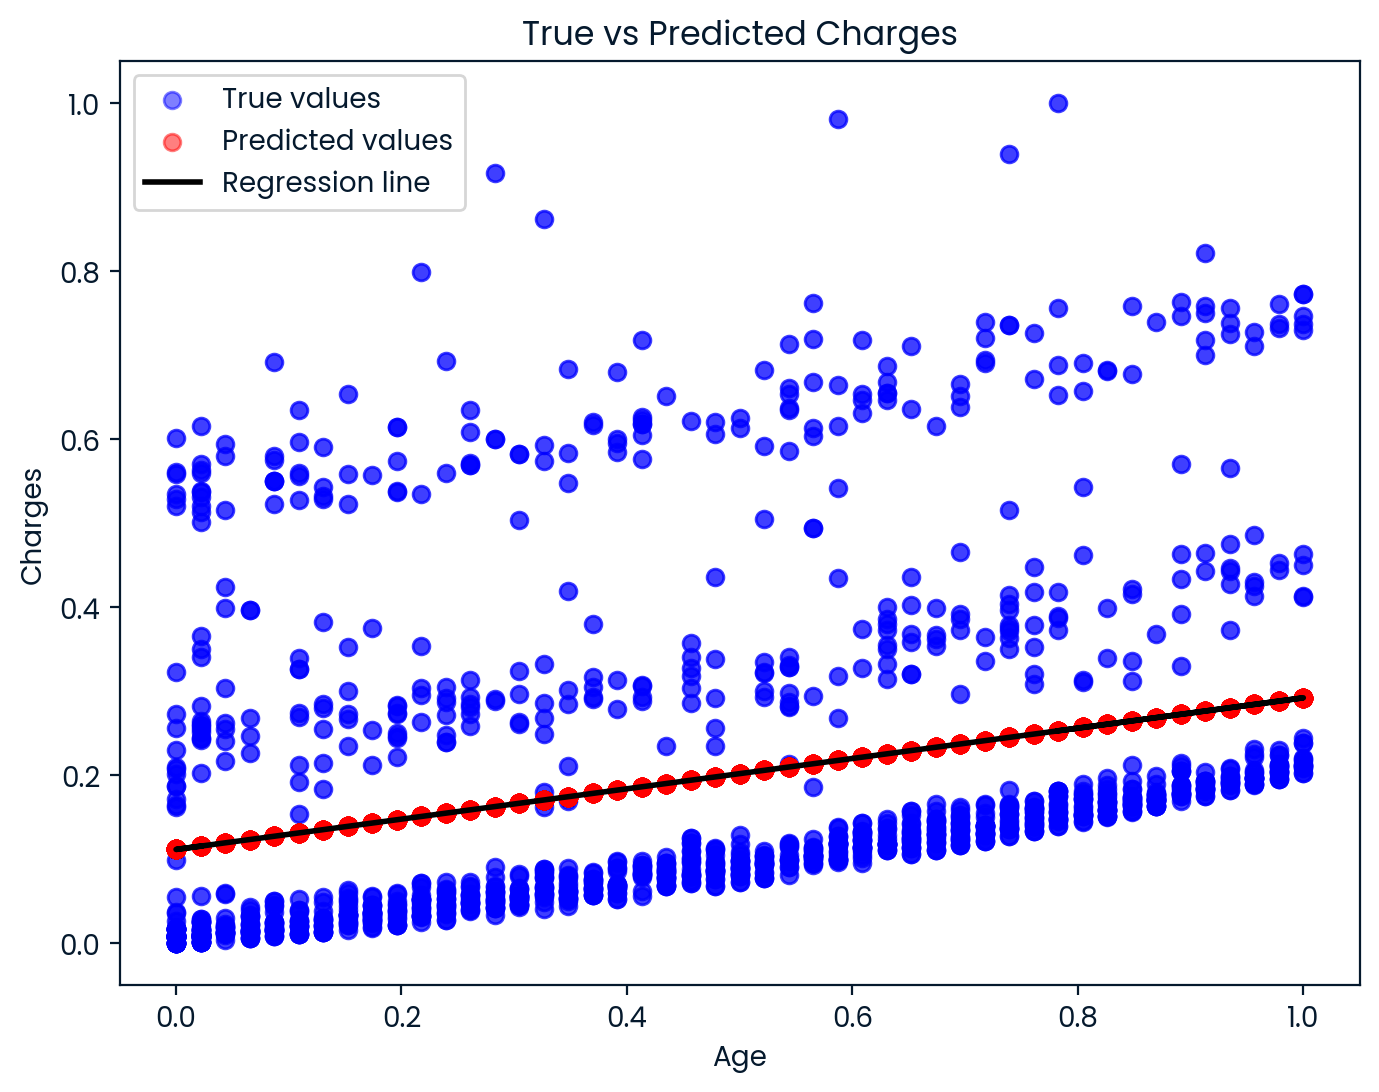

In [277]:
plt.figure(figsize=(8, 6))
plt.scatter(X_age, y, color='blue', label='True values', alpha=0.5)
plt.scatter(X_age, y_pred_age, color='red', label='Predicted values', alpha=0.5)
plt.plot(X_age, y_pred_age, color='black', linewidth=2, label='Regression line')

# Labels and legend
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('True vs Predicted Charges')
plt.legend()
plt.show()

In [278]:
# Make predictions and evaluate the model
y_pred = model_single.predict(X_test[['age']])

In [279]:
# Calculate Mean Absolute Error (L1 loss / MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae) 

# Calculate Mean Squared Error (L2 loss / MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse) 

Mean Absolute Error: 0.14406409588952584
Mean Squared Error: 0.034390499506044114


# Linear Regression with multiple inputs

In [287]:
X = df_sklearn_encoded.drop('charges', axis=1)  # Input multiple features
y = df_sklearn_encoded['charges']                   # Target variable

In [288]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [289]:
# Train the Linear Regression model
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

LinearRegression()

In [290]:
y_pred = model_multiple.predict(X_test)

In [291]:
# Calculate Mean Absolute Error (L1 loss / MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae) 

# Calculate Mean Squared Error (L2 loss / MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse) 

Mean Absolute Error: 0.06640612914159712
Mean Squared Error: 0.010174473607816828


# DNN

In [294]:
bmi = np.array(X_train['bmi'])

# Create a Normalization layer without specifying input_shape
bmi_normalizer = layers.Normalization(input_shape=[1, ], axis=None)
bmi_normalizer.adapt(bmi)

bmi_model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    bmi_normalizer,
    layers.Dense(units=1)
])

bmi_model.summary()

2025-03-20 08:38:59.466141: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [295]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [296]:
dnn_bmi_model_single = build_and_compile_model(bmi_normalizer)

In [297]:
dnn_bmi_model_single.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                128       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [300]:
%%time
history = dnn_bmi_model_single.fit(
    X_train['bmi'],
    y_train,  # Corrected from X_test to y_train
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 9.69 s, sys: 3 s, total: 12.7 s
Wall time: 7.26 s


In [315]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 5000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [age]')
  plt.legend()
  plt.grid(True)

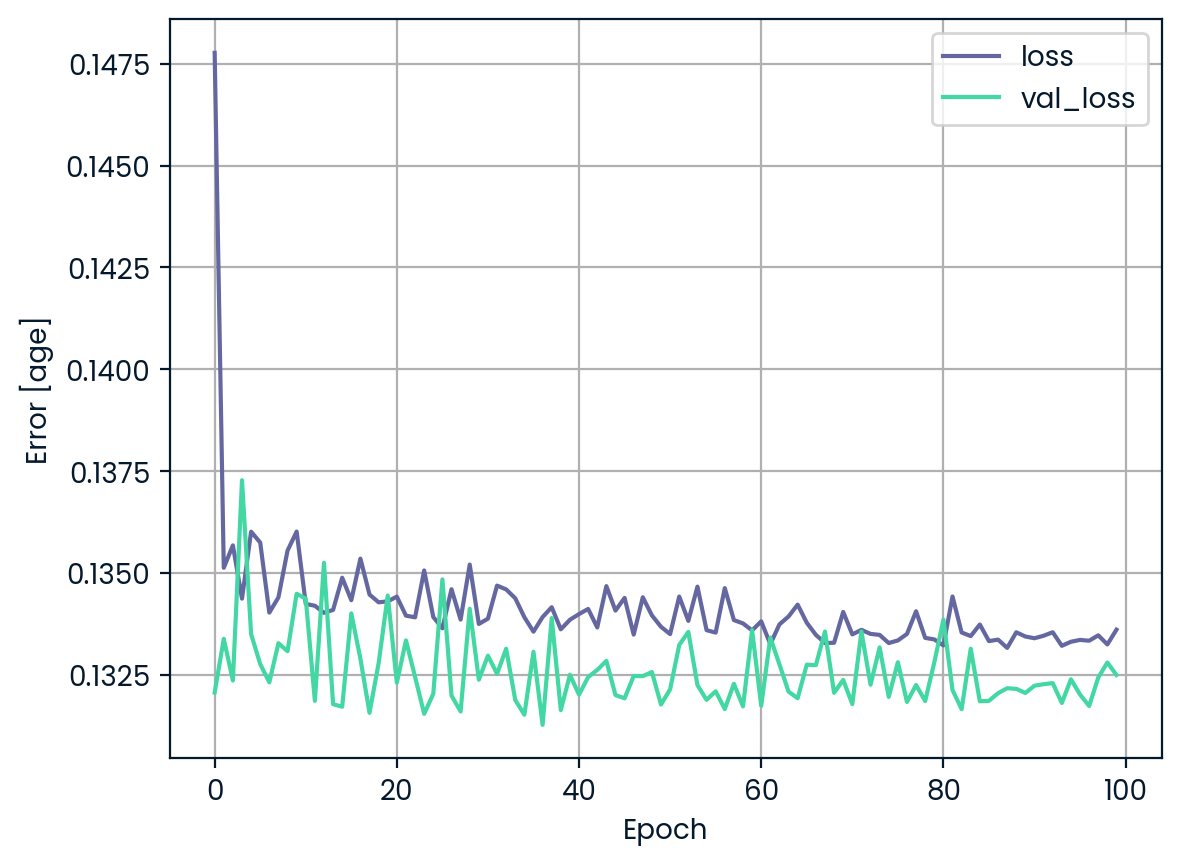

In [316]:
plot_loss(history)

In [318]:
test_results = {}

test_results['dnn_bmi_model'] = dnn_bmi_model_single.evaluate(
    X_test['bmi'], y_test,
    verbose=0)
print("Test results (loss and metrics):", test_results['dnn_bmi_model'])

Test results (loss and metrics): 0.13330264389514923


# Regression using a DNN and multiple inputs

In [319]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [320]:
normalizer.adapt(np.array(X_train))

In [321]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 11)               23        
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                768       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________


In [322]:
print(normalizer.mean.numpy())

[[0.46323863 0.39697215 1.1046464  0.23951289 0.24267033 0.27153814
  0.24627881 0.48940018 0.5106     0.79070807 0.20929182]]


In [323]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 11)               23        
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 64)                768       
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________


In [327]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, 
    epochs=100)

CPU times: user 10.4 s, sys: 3.27 s, total: 13.7 s
Wall time: 7.37 s


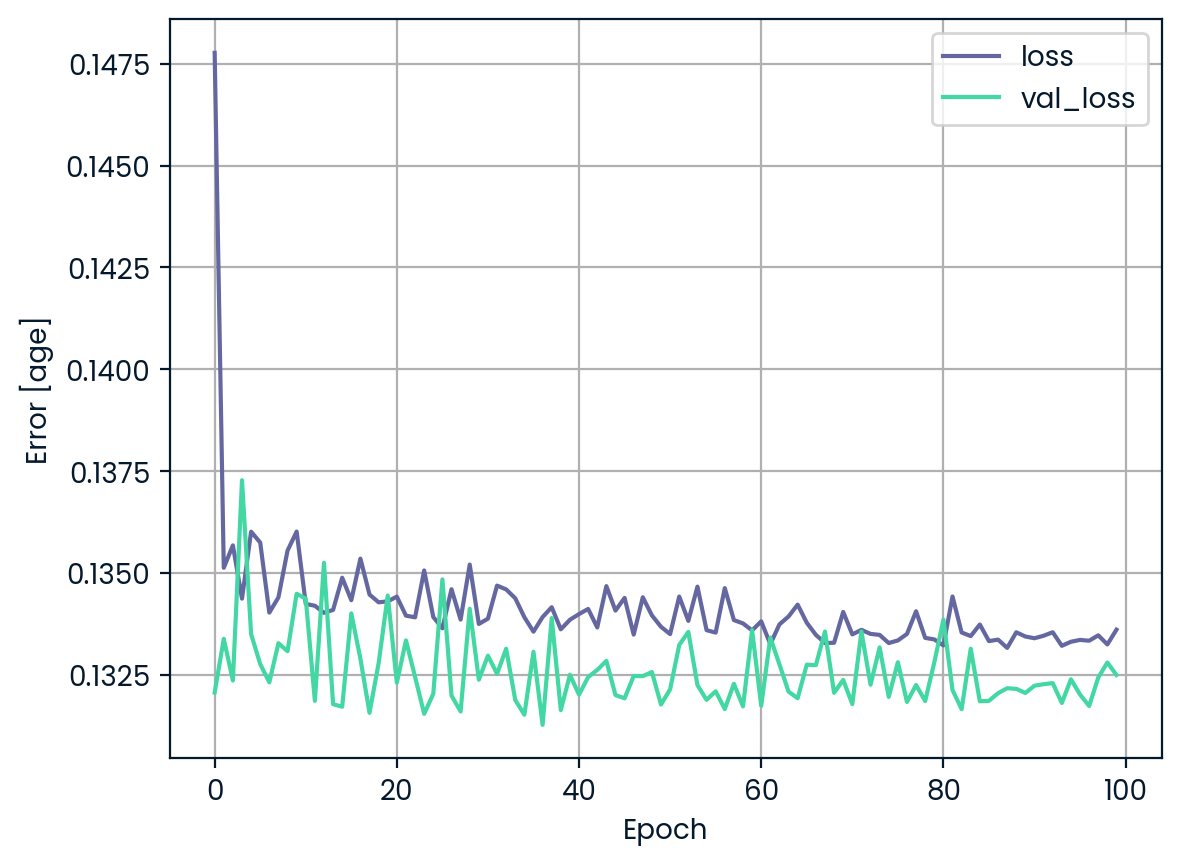

In [325]:
plot_loss(history)

In [330]:
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test, verbose=0)

In [331]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

Mean absolute error
dnn_bmi_model             0.133303
dnn_model                 0.031938

18/18 [==============================] - 0s 805us/step


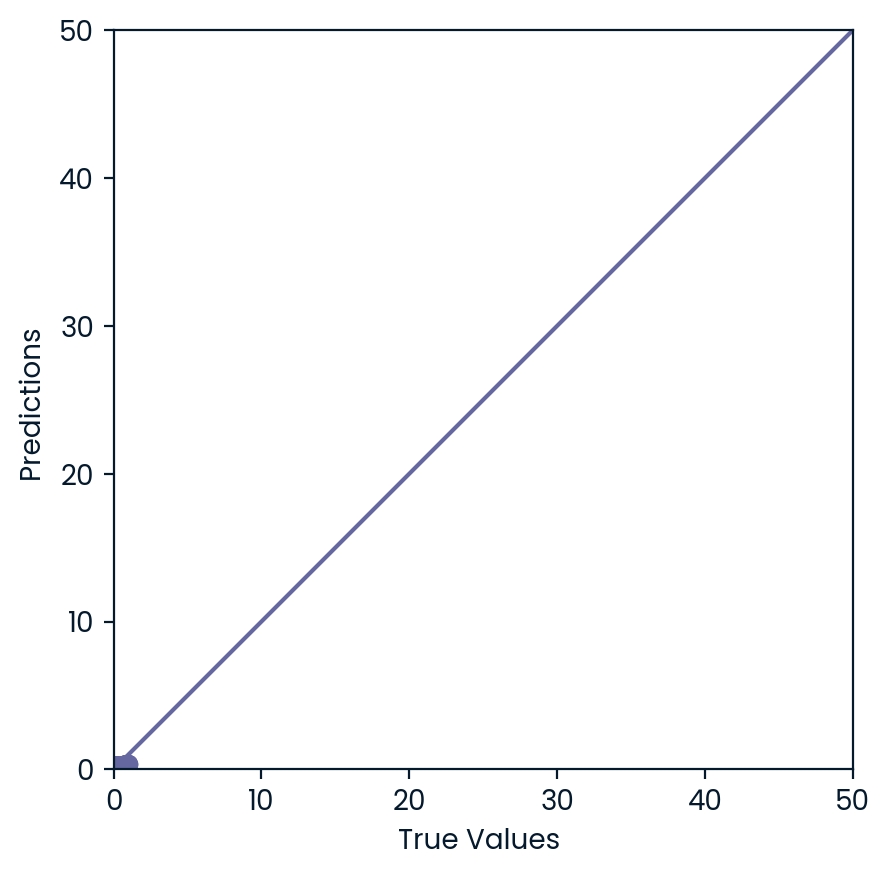

In [333]:
# Ensure y_pred is predicted using y_test instead of y_train
y_pred = dnn_model.predict(y_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

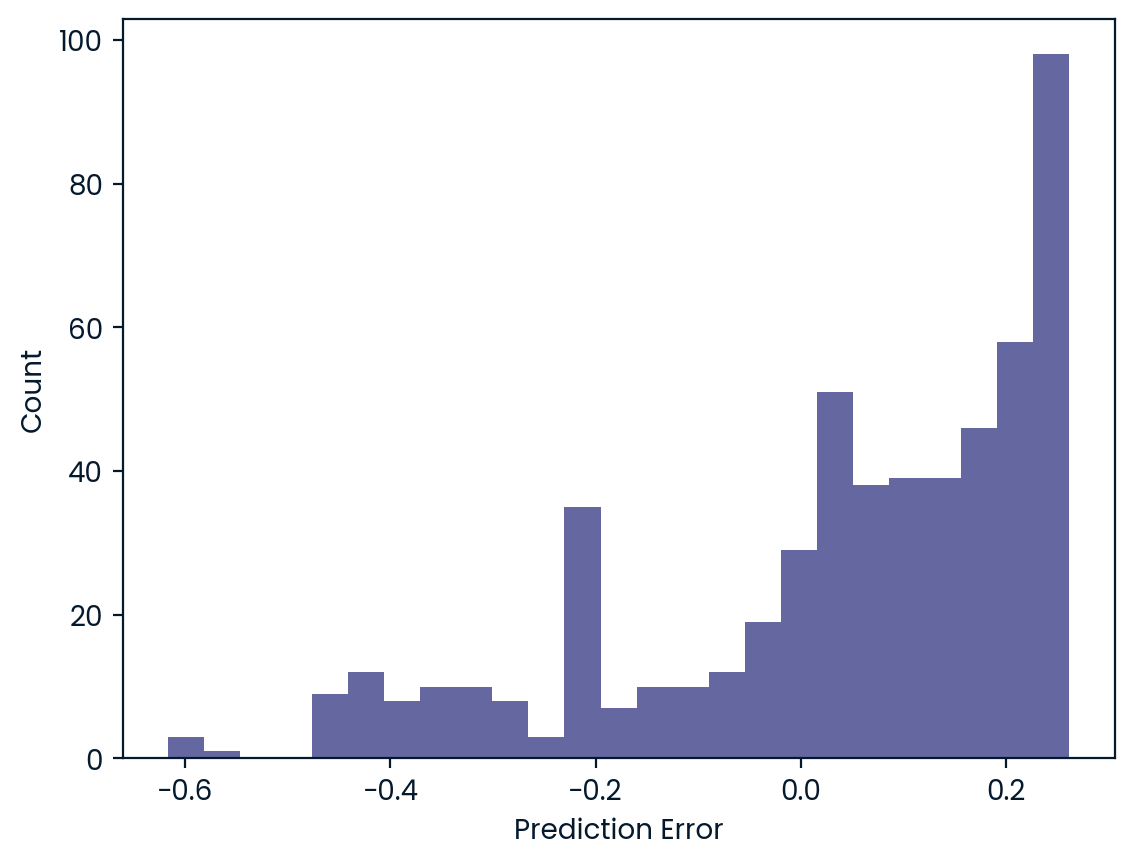

In [336]:
error = y_pred - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [337]:
dnn_model.save('dnn_model.keras')

In [ ]:
import tensorflow as tf

# Load the model
reloaded = tf.keras.models.load_model('dnn_model.keras')

# Assuming x_test and y_test are the correct test datasets
test_results = {}
test_results['reloaded'] = reloaded.evaluate(
    x_test, y_test, verbose=0)

ValueError: All `axis` values to be kept must have known shape. Got axis: (-1,), input shape: [None, None], with unknown axis at index: 1

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error']).T